# 데이터의 불균형 문제에 대한 처리 방법
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 이상을 정확하게 분류하는 것이 중요
- 보통 이상의 데이터를 target 데이터로 사용하는 경우가 많다.
- 데이터가 불균형한 경우 분류의 성능과 target 데이터를 정확하게 분류하는 데에 일치하지 않는 부분이 발생 (예측이 떨어진다)
- 소수의 데이터의 중요도가 낮게 판단되어 실제 모델이 해당하는 예측을 적게 발생시킴
- 이러한 경우에는 소수의 데이터를 증가시키는 오버 샘플링, 다수의 데이터에서 일부만 사용하는 언더 샘플링

In [173]:
# 샘플링 라이브러리 설치
# !pip install imbalanced-learn

- 언더 샘플링
    - 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터의 수 수준으로 감소 시키는 방법
    - 이 기법은 데이터 불균형 문제에 대한 해결은 되지만 전체 데이터 개수가 감소하여 학습의 성능을 떨어뜨릴 수 있다.

In [174]:
import numpy as numpy
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [175]:
# 랜덤 데이터셋을 생성
# 90:10의 비율로 데이터를 생성

x, y = make_classification(
    n_samples = 1000,
    n_features = 5,
    weights = [0.9]
)

In [176]:
x

array([[-0.02568111,  0.30522974, -1.31132861,  0.92764292, -0.91901299],
       [-0.02081707,  0.9798019 , -1.0409766 ,  0.73698212, -0.730562  ],
       [-0.28912154,  0.51002974, -1.06483982,  1.11970356, -1.38100864],
       ...,
       [-1.26922898, -0.11763724, -0.09850285,  1.80069453, -3.06755962],
       [ 0.31919075, -1.8944735 ,  1.31488812, -1.3309724 ,  1.61580839],
       [-1.24682902,  0.28016547,  2.39198708,  0.07492901, -1.3845625 ]],
      shape=(1000, 5))

In [177]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [178]:
Counter(y)

Counter({np.int64(0): 900, np.int64(1): 100})

In [179]:
# RandomUnderSampler class 생성
undersampler = RandomUnderSampler()

In [180]:
df = pd.DataFrame(data = x)
df['target'] = y
df

,0,1,2,3,4,target
0,-0.025681,0.305230,-1.311329,0.927643,-0.919013,0
1,-0.020817,0.979802,-1.040977,0.736982,-0.730562,0
2,-0.289122,0.510030,-1.064840,1.119704,-1.381009,0
3,-0.247888,1.875985,-0.758469,0.854848,-1.082930,0
4,0.159421,2.033286,-1.051977,0.498282,-0.311306,0
...,...,...,...,...,...,...
995,0.868578,0.910865,-1.933371,0.129566,0.789752,0
996,-0.162785,0.431368,0.691413,-0.248266,0.067361,1
997,-1.269229,-0.117637,-0.098503,1.800695,-3.067560,0
998,0.319191,-1.894473,1.314888,-1.330972,1.615808,1


In [181]:
# undersampler 안에 있는 함수를 호출
x_under, y_under = undersampler.fit_resample(x, y)

In [182]:
under_df = pd.DataFrame(data = x_under)
under_df['target'] = y_under
under_df['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [183]:
under_df

,0,1,2,3,4,target
0,-0.065529,0.844541,0.534207,-0.274105,0.194586,0
1,0.969700,0.688562,-2.076674,0.088984,0.935222,0
2,0.783718,-0.123422,-0.964745,-0.413825,1.222921,0
3,0.267907,0.630813,-1.179213,0.436703,-0.137893,0
4,0.729318,-0.279689,-1.579742,0.079082,0.691698,0
...,...,...,...,...,...,...
195,-0.404186,1.032121,-0.162656,0.662792,-1.062790,1
196,-0.760009,0.769760,1.355892,0.115204,-0.910823,1
197,-0.162785,0.431368,0.691413,-0.248266,0.067361,1
198,0.319191,-1.894473,1.314888,-1.330972,1.615808,1


In [184]:
# undersampler에서 데이터의 비율을 변경
# class 생성시 비율을 지정
# sampling_strategy 매개변수 -> 소수의 데이터의 비율을 의미(다수의 데이터의 개수를 지정)
undersampler2 = RandomUnderSampler(sampling_strategy=0.3)
x_under2, y_under2 = undersampler2.fit_resample(x, y)

In [185]:
Counter(y_under2)

Counter({np.int64(0): 333, np.int64(1): 100})

- 오버샘플링
    - 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법
    - 데이터의 손실이 없기 때문에 일반적으로 언더 샘플링에 비해 주로 사용

- 랜덤오버샘플링
    - 소수의 데이터를 단순 복제하여 다수의 데이터와의 비율을 맞춰주는 방법
    - 데이터가 단순 복제이기때문에 분포가 변하지 않는다
    - 단순하게 수가 증가하기 때문에 가중치 발생
    - 오버피팅의 위험성이 존재하지만 데이터의 불균형 문제를 해결하는 것이 더 유효

In [186]:
from imblearn.over_sampling import RandomOverSampler

In [187]:
oversampler = RandomOverSampler()

In [188]:
x_over, y_over = oversampler.fit_resample(x, y)

In [189]:
Counter(y_over)

Counter({np.int64(0): 900, np.int64(1): 900})

- SMOTE
    - 소수의 데이터의 관측 값에 대한 K개의 최근접 양수를 이웃으로 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법

In [190]:
from imblearn.over_sampling import SMOTE

In [191]:
smote_sampler = SMOTE()

In [192]:
x_sm, y_sm = smote_sampler.fit_resample(x, y)

In [193]:
Counter(y_sm)

Counter({np.int64(0): 900, np.int64(1): 900})

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
x[:, 1]

array([ 0.30522974,  0.9798019 ,  0.51002974,  1.87598546,  2.03328641,
        0.75753288,  0.87679256,  1.32065805,  1.59937809, -0.16732772,
       -0.12643492, -0.91801578, -0.81059517,  1.35961403,  0.9269913 ,
        0.59291487,  0.18496798,  0.56984487, -1.77850901,  0.4825163 ,
        0.78477618,  1.28135793, -1.36312863, -0.46216075,  0.22505757,
        0.99743075, -0.33735266, -0.11517619, -0.86580927,  0.08571747,
        2.01935404, -0.11885124,  0.01689108, -1.00101132, -1.22738921,
        0.77108471,  1.03673426,  0.58450392,  0.16939656, -0.59365796,
        0.41665287,  0.44335714,  0.62143952, -0.00867483,  0.28339776,
       -1.28099697, -0.4502531 ,  0.41193071,  0.76390347, -0.09408123,
       -1.20930031, -0.5932652 ,  0.21756709,  0.89343666,  0.07944529,
       -0.22075431,  0.36584342, -0.13416239,  0.10861992,  0.47021233,
        0.59001078, -0.02070515, -0.94908762,  0.08066899,  0.71043238,
       -0.06676659,  0.4086053 , -0.59091402, -2.75293177,  1.06

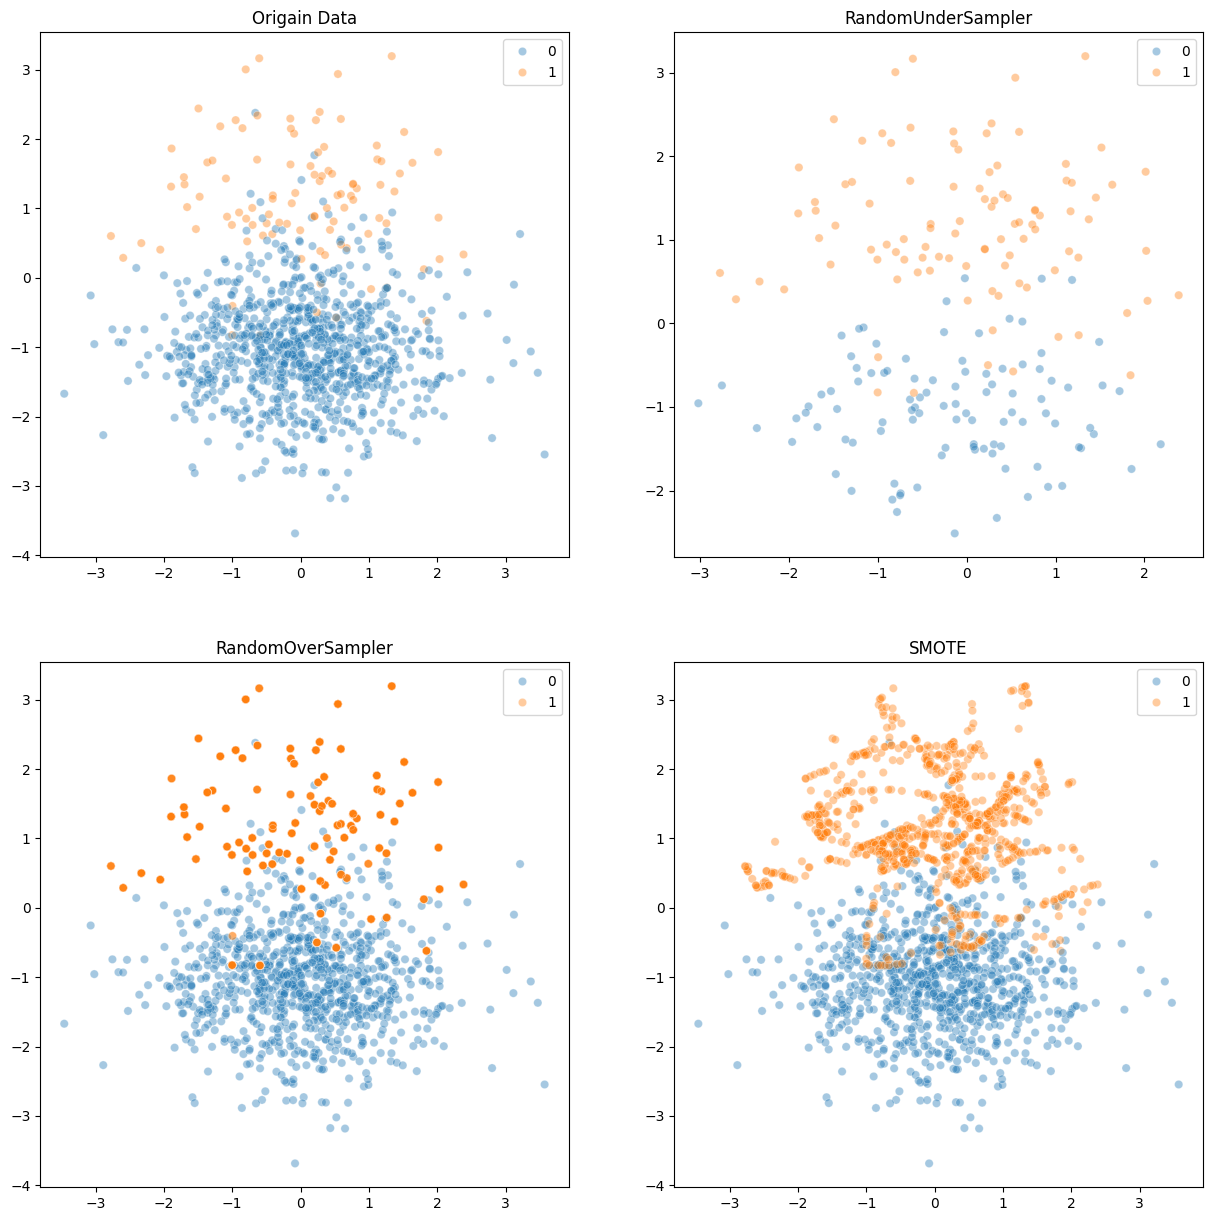

In [197]:
# 도화지의 영역을 행으로 2개 열로 2개 나눈다
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))

# 산점도 그래프를 생성
sns.scatterplot(
    x = x[:, 1], y = x[:, 2], ax = axes[0][0], hue = y, alpha = 0.4
)
sns.scatterplot(
    x = x_under[:, 1], y = x_under[:, 2], ax = axes[0][1], hue = y_under, alpha = 0.4
)
sns.scatterplot(
    x = x_over[:, 1], y = x_over[:, 2], ax = axes[1][0], hue = y_over, alpha = 0.4
)
sns.scatterplot(
    x = x_sm[:, 1], y = x_sm[:, 2], ax = axes[1][1], hue = y_sm, alpha = 0.4
)
axes[0][0].set_title('Origain Data')
axes[0][1].set_title('RandomUnderSampler')
axes[1][0].set_title('RandomOverSampler')
axes[1][1].set_title('SMOTE')
plt.show()